In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df1=df.drop(columns=["PassengerId","Name","Ticket","Cabin"])   #new df

In [16]:
label_encoder = LabelEncoder()
df1['Sex']=label_encoder.fit_transform(df1['Sex'])

In [41]:
print(df1['Age'].mean())
print(df1['Age'].median())
print(df1['Age'].mode())

29.69911764705882
28.0
0    24.0
Name: Age, dtype: float64


<Axes: xlabel='Age', ylabel='Count'>

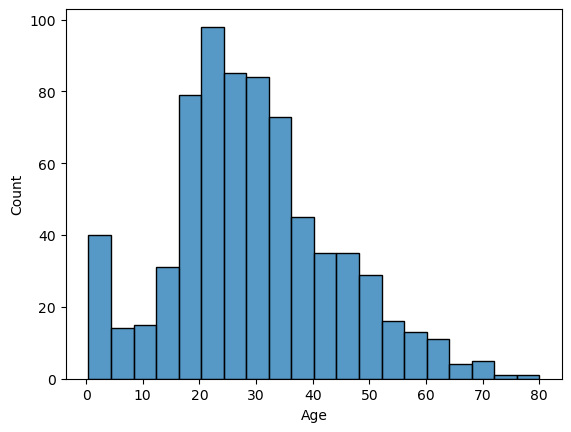

In [33]:
sns.histplot(df['Age'])

In [45]:
df1['Age'].fillna(df['Age'].median(),inplace=True)

C:\Users\Rahul\AppData\Local\Temp\ipykernel_7832\1880050444.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Age'].fillna(df['Age'].median(),inplace=True)


<Axes: xlabel='Embarked', ylabel='Count'>

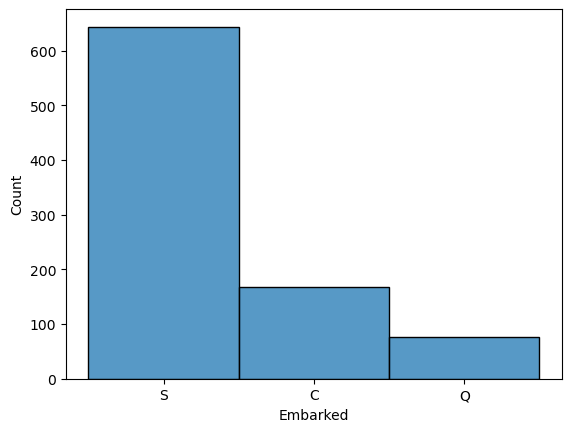

In [53]:
sns.histplot(df['Embarked'])

In [55]:
df1["Embarked"].fillna(df1["Embarked"].mode()[0], inplace=True) 

C:\Users\Rahul\AppData\Local\Temp\ipykernel_7832\3655099464.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["Embarked"].fillna(df1["Embarked"].mode()[0], inplace=True)


In [57]:
df1['Embarked']=label_encoder.fit_transform(df1['Embarked'])

In [59]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


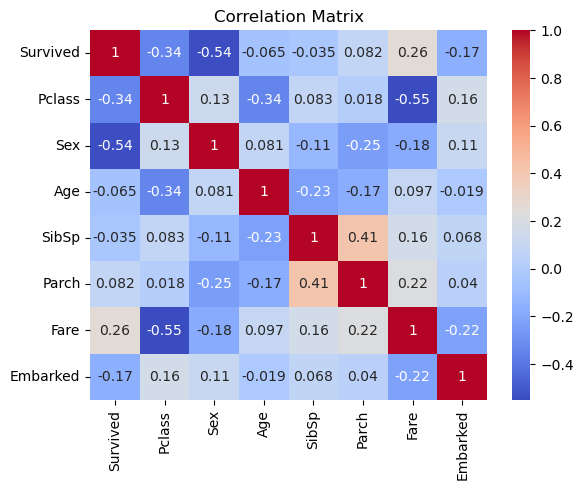

In [71]:
corr_matrix = df1.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
#no multicolinearity present

In [73]:
X =df1.drop(columns=["Survived"])
y=df1['Survived']

In [75]:
print(X)
print(y)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         3    1  22.0      1      0   7.2500         2
1         1    0  38.0      1      0  71.2833         0
2         3    0  26.0      0      0   7.9250         2
3         1    0  35.0      1      0  53.1000         2
4         3    1  35.0      0      0   8.0500         2
..      ...  ...   ...    ...    ...      ...       ...
886       2    1  27.0      0      0  13.0000         2
887       1    0  19.0      0      0  30.0000         2
888       3    0  28.0      1      2  23.4500         2
889       1    1  26.0      0      0  30.0000         0
890       3    1  32.0      0      0   7.7500         1

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [87]:
print(X_train.head())

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
445       1    1   4.0      0      2  81.8583         2
650       3    1  28.0      0      0   7.8958         2
172       3    0   1.0      1      1  11.1333         2
450       2    1  36.0      1      2  27.7500         2
314       2    1  43.0      1      1  26.2500         2


In [89]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 709 to 430
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    268 non-null    int64  
 1   Sex       268 non-null    int32  
 2   Age       268 non-null    float64
 3   SibSp     268 non-null    int64  
 4   Parch     268 non-null    int64  
 5   Fare      268 non-null    float64
 6   Embarked  268 non-null    int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 14.7 KB


In [93]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [101]:
y_prediction = model.predict(X_test)

In [107]:
accuracy = accuracy_score(y_test, y_prediction)
f"the accuracy of model is: {accuracy}"

'the accuracy of model is: 0.8134328358208955'

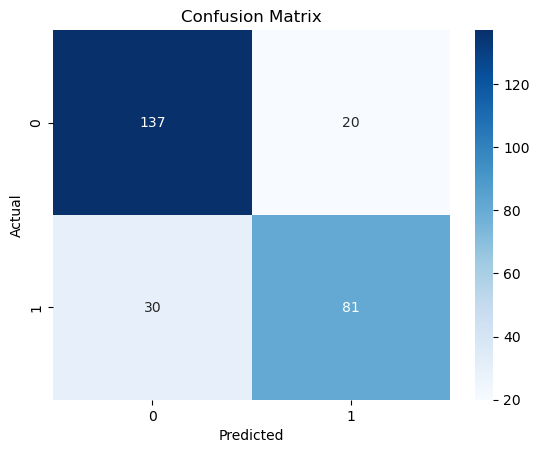

In [114]:
con_mat=confusion_matrix(y_test,y_prediction)
sns.heatmap(con_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [116]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       157
           1       0.80      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

